# Деревья решений. Классификация

## 1. Критерий информативности с нуля

построение дерева зависит от следующих факторов:
* вид правила разбиения
* критерий информативности
* критерий останова
* проблема пропусков

рассмотрим критерии информативности

In [1]:
import numpy as np
from collections import Counter
import math

In [2]:
Counter([9,9,9,7,7,3,3,3,4,4])

Counter({9: 3, 7: 2, 3: 3, 4: 2})

*Нам понадобятся две библиотеки: numpy, а объект класса Counter в заданном списке просто подсчитывает количество вхождений каждого элемента и возвращает результат в виде словаря. Пример:*

In [3]:
Counter([9,9,9,7,7])

Counter({9: 3, 7: 2})

*Для численного измерения улучшения разбиений на каждом этапе мы вводим некоторый *критерий информативности*, который будет оценивать разнообразие объектов в выборке: чем больше разных классов в выборке, тем больше значение H(R). Чем меньше взвешенное значение критерия после разбиения - тем лучше*

Функция для расчёта энтропийного критерия качества:

$H(R) = -\sum_{k=1}^{K}p_klogp_k$

**Задание.** Дополните функцию расчёта энтропийного критерия множества

In [4]:
def HEntropy(l):
    length = len(l)
   
    cnt = Counter(l).values()
   

    ps = (v / length for v in cnt)
    
    H = -sum(p*math.log2(p) for p in ps)
    return H

In [5]:
HEntropy((1,1,1,1,2,2,2,3,3,3,4))

1.867633890971212

In [6]:
HEntropy((2,2,2,3,3,3,4))

1.4488156357251847

In [8]:
HEntropy((1,1,1,1,1,2))

0.6500224216483541

**Задание.** По аналогии с *энтропийным критерием* заполните функции *критерия Джини*

In [9]:
def HGini(l):
    length = len(l)
    cnt = Counter(l).values()
    
    ps = (v / length for v in cnt)
    H = sum(p*(1-p) for p in ps)
    return H

*Information Gain (IG)* - функционал качества, отвечающий на вопрос, а сколько энтропии мы погасили при определённом разбиении? На каждом шаге разбиения при построении дерева максимизируется IG. Формула для вычисления при критерии информативности H:

$IG(R) = H(R) - \frac{|R_l|}{|R|}H(R_l) - \frac{|R_r|}{|R|}H(R_r)$

**Задание.** Заполните функцию для вычисления функционала качества

In [10]:
def IG(H, l, i):
    length = len(l)
    return H(l) - i/length*H(l[:i]) - (length-i)/length*H(l[i:])

In [11]:
l = (1,2,1,2,1,1,3,3,3)

In [12]:
IG(HGini, l, 6)

0.345679012345679

Функция для визуализации работы произвольного критерия качества на выборке

In [13]:
def test_H(H, l):
    print("{:5} {:3}   {:4} {:4} {:4}".format("#","l","IG","Hl","Hr"))
    print("-"*24)
    for i in range(1,len(l)):
        print("{:2}. {:3}   {:.2f} {:.2f} {:.2f}".format(i, l[i], IG(H, l, i), H(l[:i]), H(l[i:])))

Определим как-нибудь выборку и посмотрим, какое разбиение предложат критерии информативности. Элементы здесь будут выводиться начиная со второго, а значения функций рассчитаны для разбиения *перед* элементом строки

In [14]:
l = [1]*5 + [2]*3 + [1]*4
print(l)

[1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1]


In [15]:
test_H(HEntropy, l)

#     l     IG   Hl   Hr  
------------------------
 1.   1   0.04 -0.00 0.85
 2.   1   0.08 -0.00 0.88
 3.   1   0.12 -0.00 0.92
 4.   1   0.17 -0.00 0.95
 5.   2   0.24 -0.00 0.99
 6.   2   0.03 0.65 0.92
 7.   2   0.01 0.86 0.72
 8.   1   0.17 0.95 -0.00
 9.   1   0.12 0.92 -0.00
10.   1   0.08 0.88 -0.00
11.   1   0.04 0.85 -0.00


In [17]:
test_H(HGini, l)

#     l     IG   Hl   Hr  
------------------------
 1.   1   0.01 0.00 0.40
 2.   1   0.02 0.00 0.42
 3.   1   0.04 0.00 0.44
 4.   1   0.06 0.00 0.47
 5.   2   0.09 0.00 0.49
 6.   2   0.01 0.28 0.44
 7.   2   0.00 0.41 0.32
 8.   1   0.06 0.47 0.00
 9.   1   0.04 0.44 0.00
10.   1   0.02 0.42 0.00
11.   1   0.01 0.40 0.00


**Задание.** проверьте, какое разбиение будет сделано на втором шаге?

In [19]:
test_H(HGini, l[4:])

#     l     IG   Hl   Hr  
------------------------
 1.   2   0.04 0.00 0.49
 2.   2   0.01 0.50 0.44
 3.   2   0.10 0.44 0.32
 4.   1   0.28 0.38 0.00
 5.   1   0.17 0.48 0.00
 6.   1   0.09 0.50 0.00
 7.   1   0.04 0.49 0.00


## 2. Визуализация принятия решений классификатором sklearn

#### 1. Используем данные о цветках ириса из занятия

In [1]:
from sklearn.datasets import load_iris
import pandas as pd

In [21]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [22]:
iris = load_iris()

In [23]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

#### Задание

1. Постройте dataframe

In [24]:
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.DataFrame(iris.target, columns=['species'])
df = pd.concat([X,y], axis=1)

In [25]:
print(df.shape)
df.head()

(150, 5)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Выведем попарное распределение фичей датасета с раскраской по виду цветка

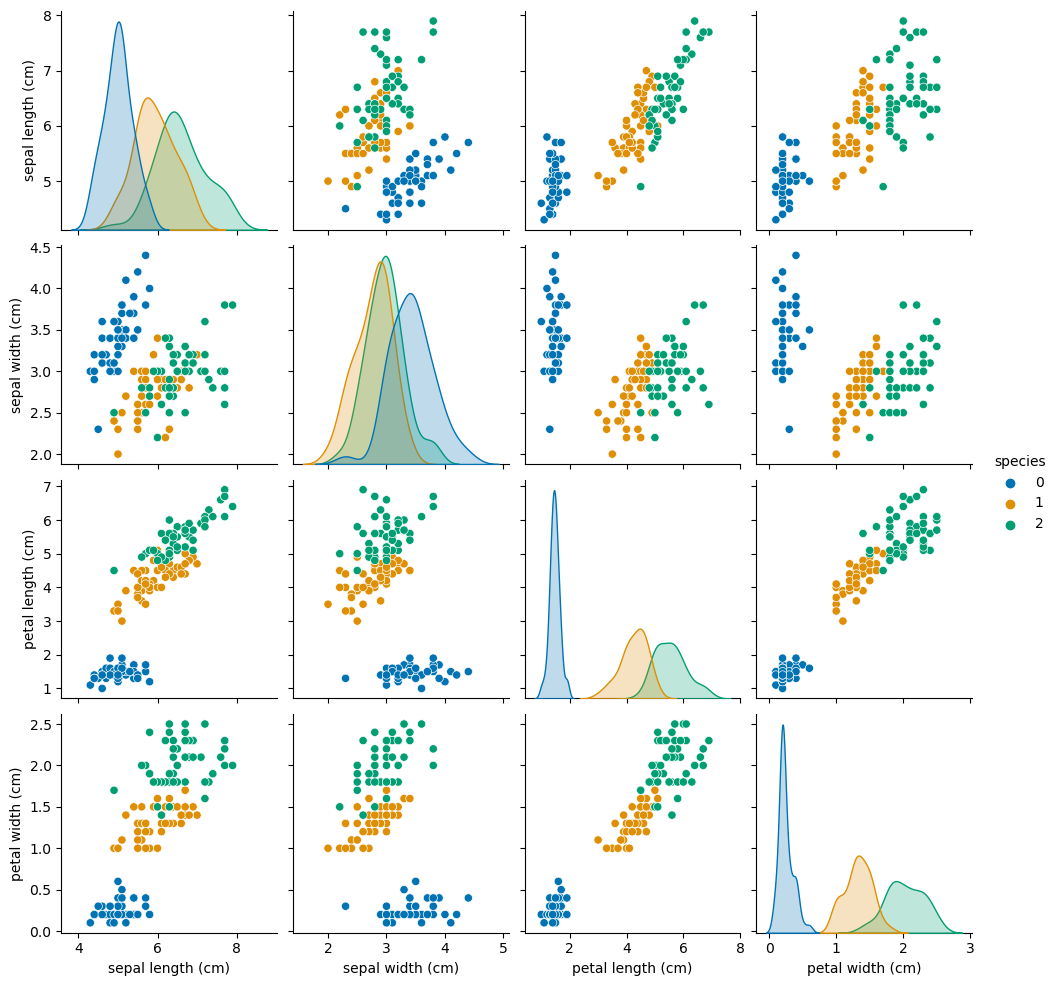

In [9]:
sns.pairplot(df, hue='species', diag_kind="kde", palette="colorblind");

визуально кажется, что ширина листка (petal width) даже самостоятельно может отделить два класса друг от друга идеально, а ещё для двух понадобится хотя бы ещё одна фича.

Возьмём пока для возможности изобразить это в 2D две фичи: длину и ширину листка

In [29]:
Xcut = X[X.columns[2:4]]

#### 2. Используем классификатор

In [26]:
from sklearn.tree import DecisionTreeClassifier

In [27]:
clf = DecisionTreeClassifier()

In [30]:
clf.fit(Xcut, y)

DecisionTreeClassifier()

In [31]:
clf.predict([ [1,1], [3,3] ])

c:\Users\wmamantw\AppData\Local\anaconda3\envs\torch\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0, 2])

In [32]:
clf.predict_proba([ [1,1], [3,3] ])

c:\Users\wmamantw\AppData\Local\anaconda3\envs\torch\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([[1.        , 0.        , 0.        ],
       [0.        , 0.33333333, 0.66666667]])

Можем теперь предсказывать. Давайте визуализируем границу принятия решений. Для удобства экспереминтирования всё упаковано в функцию **test_clf**, в неё передаётся созданный классификатор и при установленном fit_clf=True обучается внутри, а затем отрисовывает границу. Таким образом можно экспериментировать с параметрами классификатора

In [33]:
import numpy as np
def get_grid(data):
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    return np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

In [34]:
y

,species
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [35]:
def test_clf(clf, X, y, cmap=None, fit_clf=False):
    xx,yy = get_grid(X.values)
    if fit_clf:
        clf.fit(X, y)
    predicted = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    plt.figure(figsize=(8, 8))
    plt.pcolormesh(xx, yy, predicted, cmap=cmap or 'spring')
    plt.scatter(X.values[:, 0], X.values[:, 1], c='blue', s=100, cmap=cmap or 'spring', edgecolors='black')
    if fit_clf:
        return clf

*попробуйте при разной глубине*

c:\Users\wmamantw\AppData\Local\anaconda3\envs\torch\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\wmamantw\AppData\Local\Temp\ipykernel_16296\936075902.py:8: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X.values[:, 0], X.values[:, 1], c='blue', s=100, cmap=cmap or 'spring', edgecolors='black')


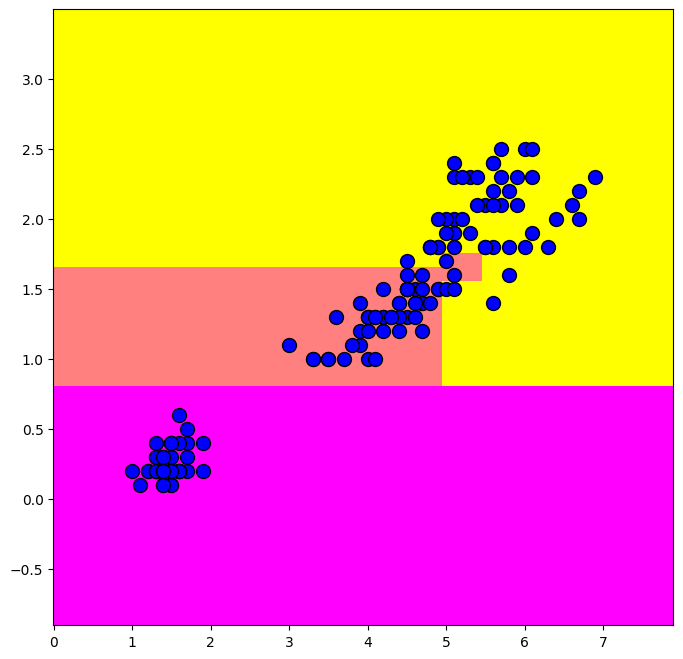

In [36]:
clf = test_clf(DecisionTreeClassifier(), Xcut, y, fit_clf=True)

обратите внимание, один блок занимает то позицию снизу, то слева: данных недостаточно для принятия однозначного решения и экстраполяция идёт произвольно

#### 3. Визуализируем само дерево

Возможно, самое замечательное свойство одиночных деревьев - возможность визуализировать их алгоритм работы и затем объяснить его человеку

Дерево можно отобразить внутри ipython-ноутбука, но сейчас воспользуемся онлайн-сервисом http://www.webgraphviz.com

Сгенерируем код дерева в формате .dot и скопируем его на сайт

In [37]:
from sklearn.tree import export_graphviz

def get_tree_dot_view(clf, feature_names=None, class_names=None):
    print(export_graphviz(clf, out_file=None, filled=True, feature_names=feature_names, class_names=class_names))

In [38]:
clf = DecisionTreeClassifier(max_depth=3)
clf.fit(Xcut, y)

DecisionTreeClassifier(max_depth=3)

In [39]:
get_tree_dot_view(clf, list(Xcut.columns), iris.target_names)

digraph Tree {
node [shape=box, style="filled", color="black", fontname="helvetica"] ;
edge [fontname="helvetica"] ;
0 [label="petal length (cm) <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]\nclass = setosa", fillcolor="#ffffff"] ;
1 [label="gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]\nclass = setosa", fillcolor="#e58139"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="petal width (cm) <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]\nclass = versicolor", fillcolor="#ffffff"] ;
0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
3 [label="petal length (cm) <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]\nclass = versicolor", fillcolor="#4de88e"] ;
2 -> 3 ;
4 [label="gini = 0.041\nsamples = 48\nvalue = [0, 47, 1]\nclass = versicolor", fillcolor="#3de684"] ;
3 -> 4 ;
5 [label="gini = 0.444\nsamples = 6\nvalue = [0, 2, 4]\nclass = virginica", fillcolor="#c09cf2"] ;
3 -> 5 ;
6 [label="petal length (cm) <= 4.85\ngini = 0.04

In [40]:
from IPython.display import Image

-----

-----

## 3. Оценка важности фичей

важность зависит от конкретного прогона классификатора, это не объективный показатель, но дающий представление

*попробуйте при разной глубине*

In [41]:
X.shape

(150, 4)

In [42]:
clf.feature_importances_

array([0.58561555, 0.41438445])

In [43]:
y.shape

(150, 1)

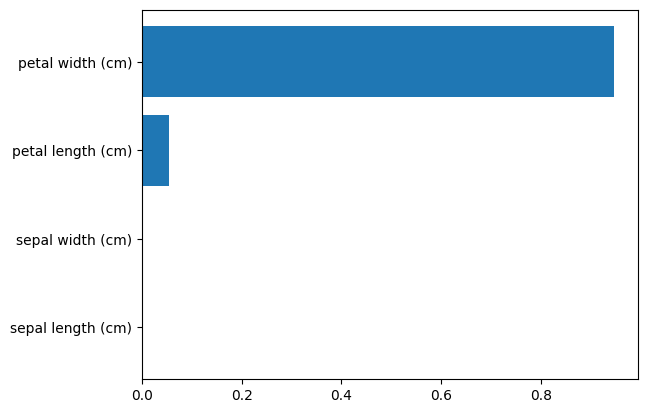

In [44]:
clf = DecisionTreeClassifier(max_depth=3)
clf.fit(X, y)

plt.barh(np.arange(len(clf.feature_importances_)), clf.feature_importances_)
plt.yticks(np.arange(len(X.columns)),X.columns);


## 4. Переообучение наглядно

In [45]:
np.seed = 7
train_data = np.random.normal(size=(100, 2))
train_labels = np.zeros(100)
train_data = np.r_[train_data, np.random.normal(size=(100, 2), loc=2)]
train_labels = np.r_[train_labels, np.ones(100)]
train_data = pd.DataFrame(train_data)

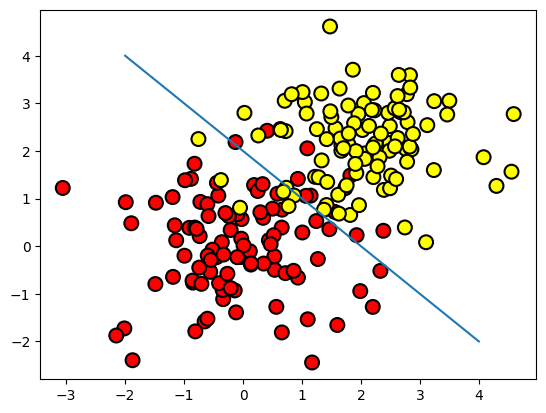

In [46]:
plt.scatter(train_data[0], train_data[1], c=train_labels, s=100, cmap='autumn', edgecolors='black', linewidth=1.5);
plt.plot(range(-2,5), range(4,-3,-1));

In [47]:
def test_clf(clf, X, y, cmap=None, fit_clf=False):
    xx,yy = get_grid(X.values)
    if fit_clf:
        clf.fit(X, y)
    predicted = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    plt.figure(figsize=(8, 8))
    plt.pcolormesh(xx, yy, predicted, cmap=cmap or 'spring')
    plt.scatter(X.values[:, 0], X.values[:, 1], c=y, s=100, cmap=cmap or 'spring', edgecolors='black')
    if fit_clf:
        return clf

*попробуйте при разной глубине*

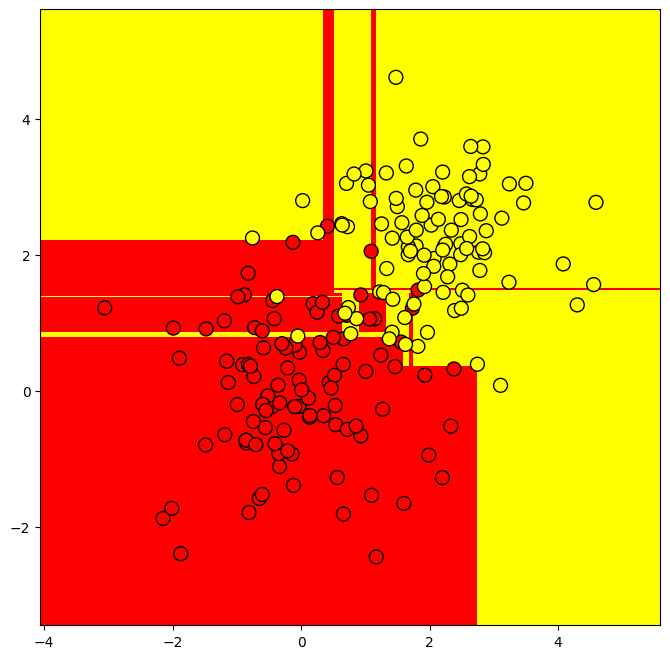

In [48]:
clf = test_clf(DecisionTreeClassifier(max_depth=10), train_data, train_labels, cmap='autumn', fit_clf=True)

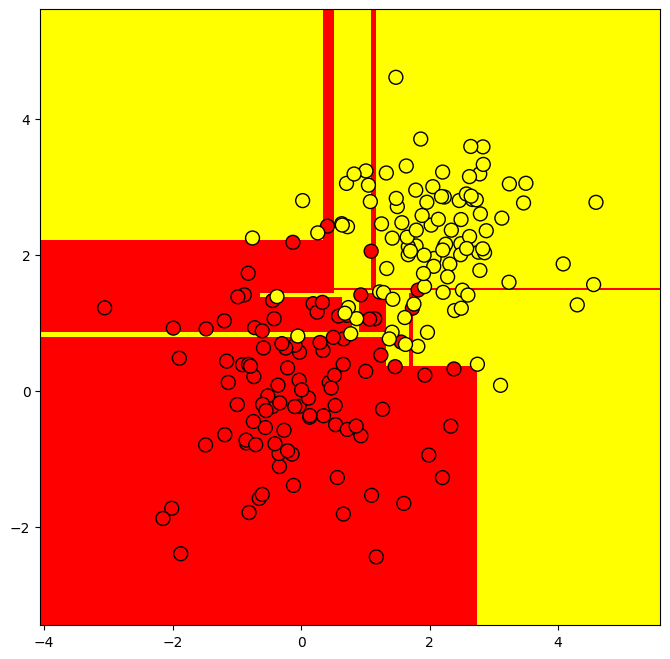

In [49]:
clf = test_clf(DecisionTreeClassifier(), train_data, train_labels, cmap='autumn', fit_clf=True)

### Визуализация дерева прямо в ноутбуке

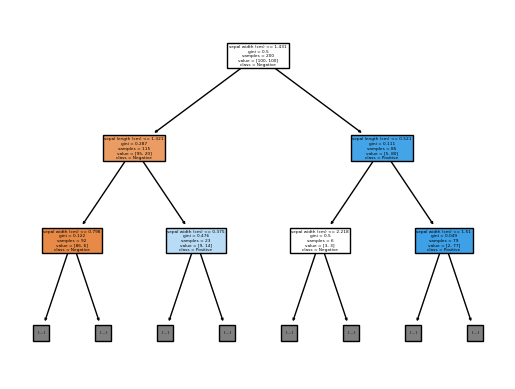

In [50]:
from sklearn import tree
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

tree.plot_tree(clf, feature_names=list(X),max_depth=2,
               class_names = ['Negative','Positive'],
               filled = True);

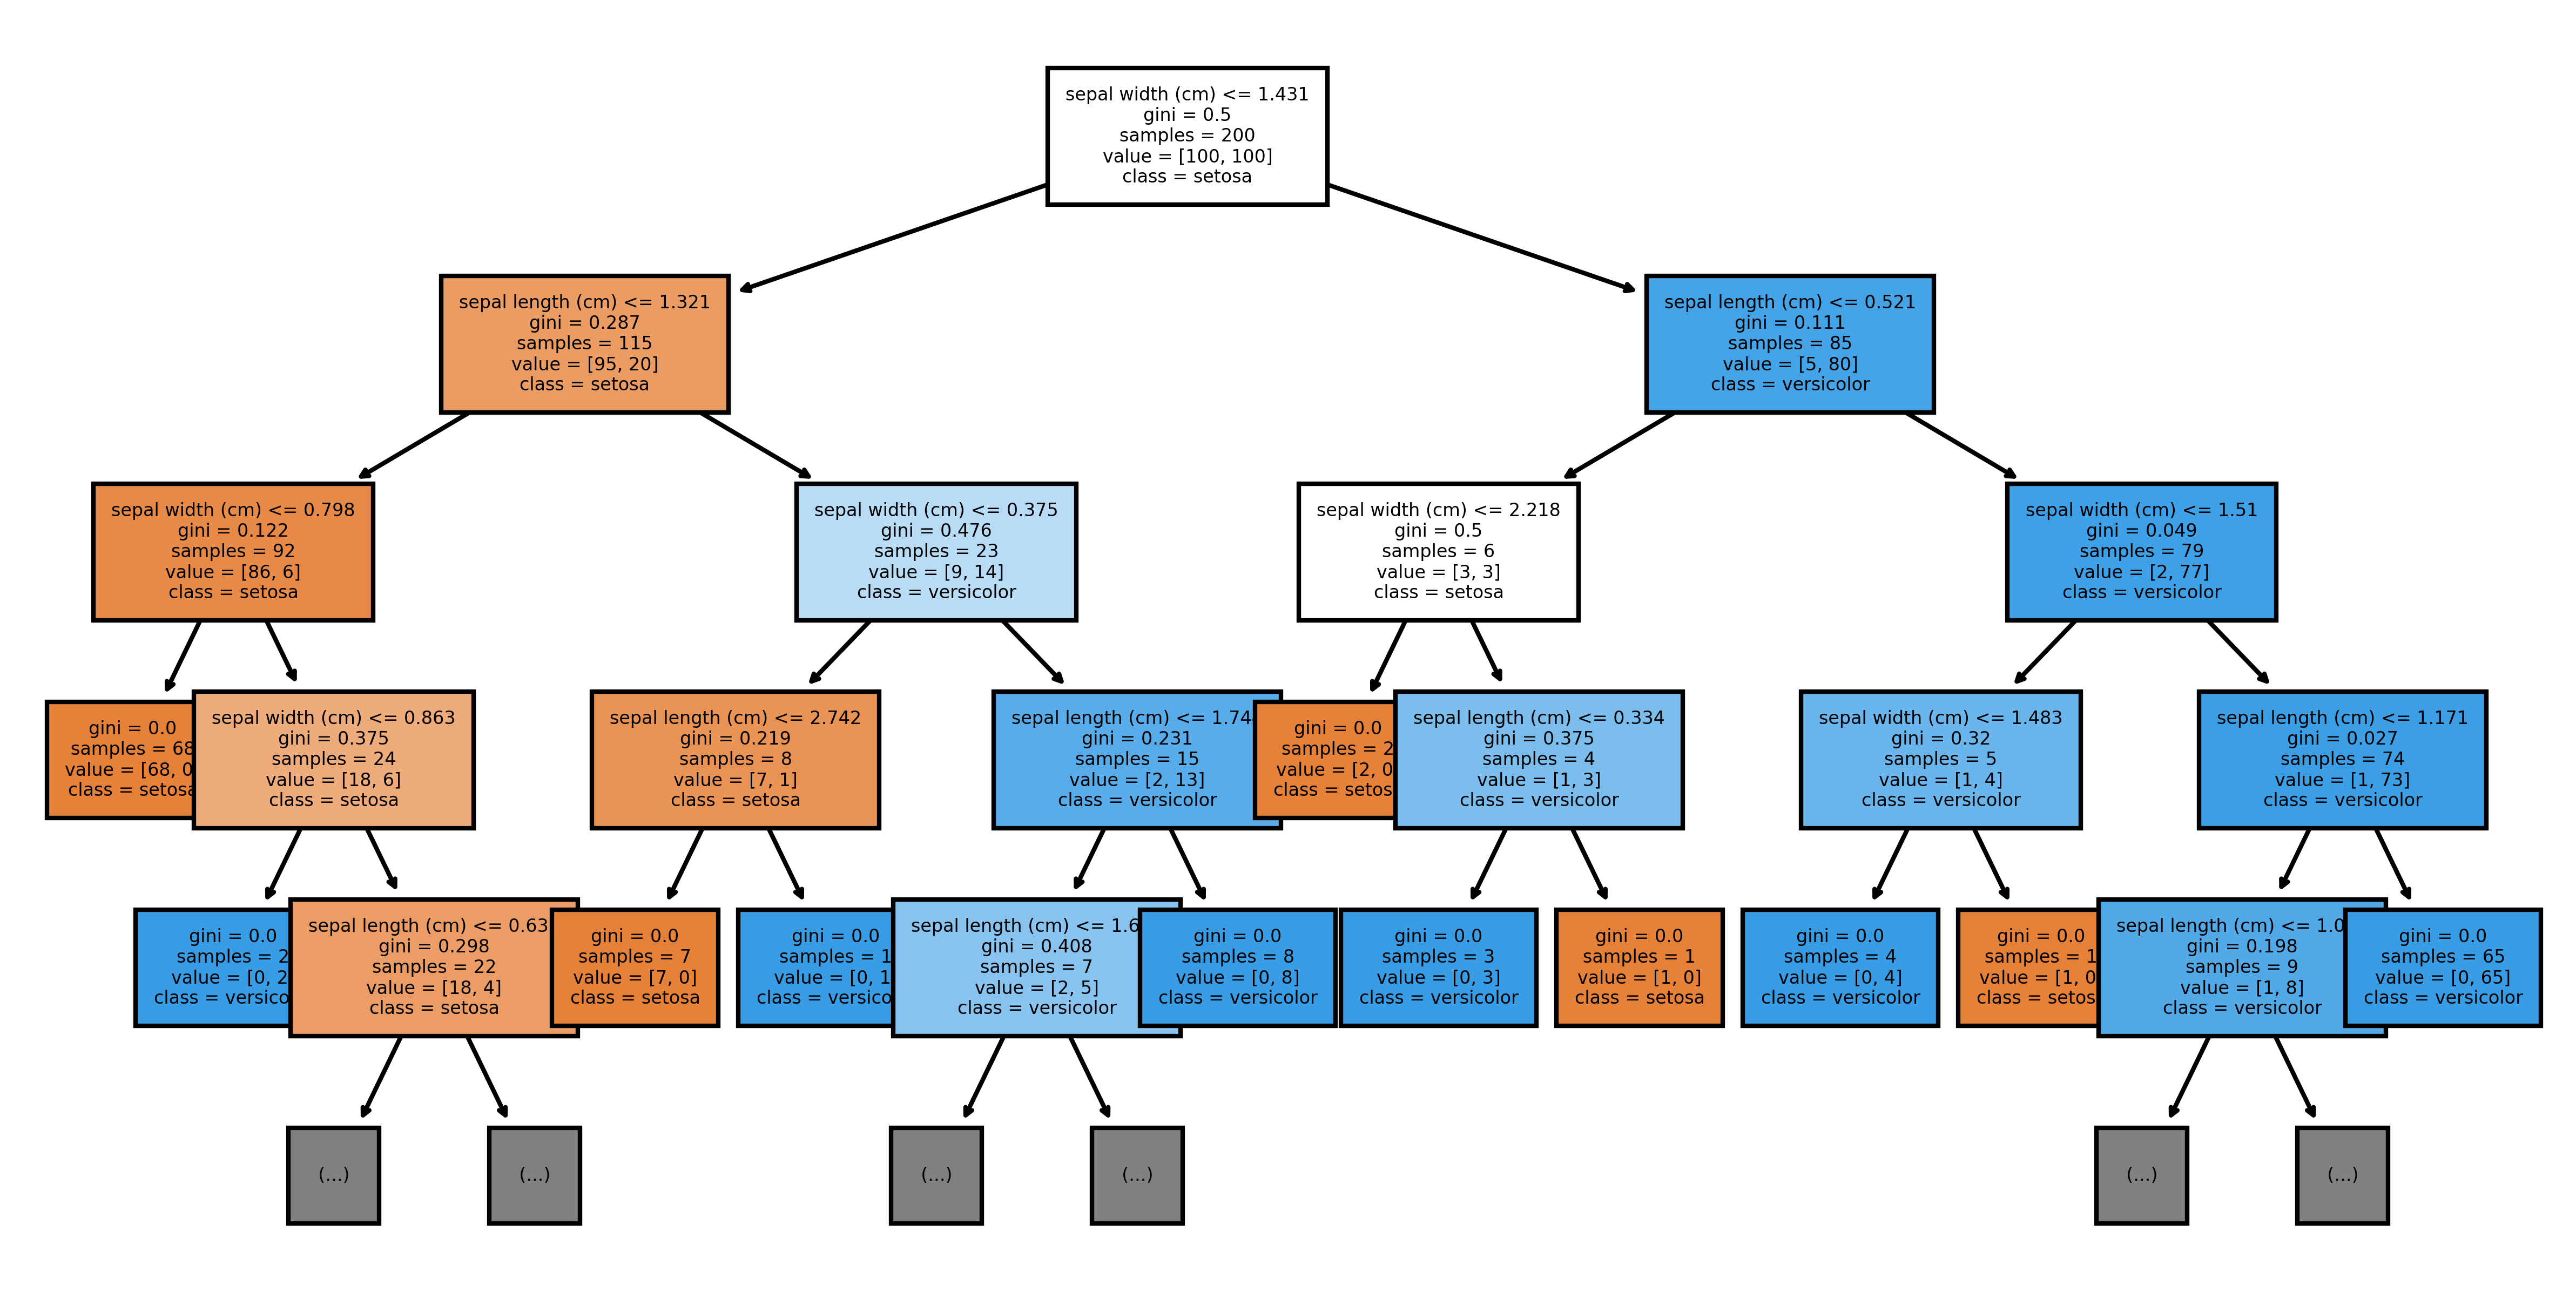

In [51]:
fn=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cn=['setosa', 'versicolor', 'virginica']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,5), dpi=600)
tree.plot_tree(clf, max_depth=4,
               feature_names = fn, 
               class_names=cn, fontsize=4,
               filled = True);

In [52]:
X.loc[0]

sepal length (cm)    5.1
sepal width (cm)     3.5
petal length (cm)    1.4
petal width (cm)     0.2
Name: 0, dtype: float64

In [53]:
np.array([5.1,3.5,1.4,0,2]).reshape(1,-1)

array([[5.1, 3.5, 1.4, 0. , 2. ]])

In [57]:
#clf.predict(np.array([5.1,3.5,1.4,np.nan]).reshape(1,-1))

In [55]:
y

,species
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


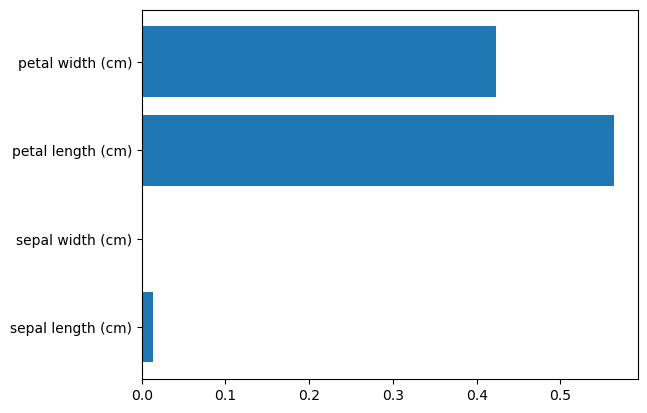

In [98]:
clf = DecisionTreeClassifier(max_depth=5)
clf.fit(X, y)

plt.barh(np.arange(len(clf.feature_importances_)), clf.feature_importances_)
plt.yticks(np.arange(len(X.columns)),X.columns);

### Задание

1. Постройте дерево решений на датасет Iris (везде использовать random_state=42)
2. Оцените работу алгоритма метрикой accuracy
3. Попробуйте улучшить результат подобрав параметры алгоритма.
4. Выполнить визуализацию.